In [16]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [17]:
# Loading cleaned datasets
df_1 = pd.read_pickle('cleaned_historical_arrears_data_1.pkl')
df_2 = pd.read_pickle('cleaned_historical_arrears_data_2.pkl')

In [18]:
# Displaying dfs
print(df_1.head())
print()
print(df_2.head())

  Customer_ID  Contract_Term  Cost_Amount_GBP Regulatory_Compliance  \
0   EJR872837             54        422562.25                    No   
1   IMX979868             91        215224.06                    No   
2   NQZ020781             90        294362.39                    No   
3   ZJE848049             43         91318.00                   Yes   
4   HYT626213             37        809735.65                    No   

  Customer_Category  Exposure_Amount_GBP Contract_Status Assistance_Flag  \
0       Corporation             17152.49          Closed             Yes   
1       Corporation             25252.94         Expired             Yes   
2       Corporation             62246.83          Active              No   
3        Individual             50347.70          Closed             Yes   
4        Individual             25850.44          Closed              No   

  Risk_Flag Payment_Status  Forbearance_Amount_GBP Payment_Interval  \
0        No        Current                 14

In [19]:
# Ensuring the data is clean before proceeding
print(df_1.info())
print()
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Customer_ID             700000 non-null  object  
 1   Contract_Term           700000 non-null  int64   
 2   Cost_Amount_GBP         700000 non-null  float64 
 3   Regulatory_Compliance   700000 non-null  category
 4   Customer_Category       700000 non-null  category
 5   Exposure_Amount_GBP     700000 non-null  float64 
 6   Contract_Status         700000 non-null  category
 7   Assistance_Flag         700000 non-null  category
 8   Risk_Flag               700000 non-null  category
 9   Payment_Status          700000 non-null  category
 10  Forbearance_Amount_GBP  700000 non-null  float64 
 11  Payment_Interval        700000 non-null  category
 12  Late_Payment_Fees_GBP   700000 non-null  float64 
 13  Total_Arrears_GBP       700000 non-null  float64 
dtypes: c

In [20]:
# Summary statistics for numerical columns
print("Summary statistics for df_1:")
print(df_1.describe())
print()
print("Summary statistics for df_2:")
print(df_2.describe())

Summary statistics for df_1:
       Contract_Term  Cost_Amount_GBP  Exposure_Amount_GBP  \
count  700000.000000    700000.000000        700000.000000   
mean       54.027671    451045.317902         34951.431882   
std        24.563111    259760.721877         19626.435113   
min        12.000000      1000.700000          1000.100000   
25%        33.000000    226284.550000         17930.922500   
50%        54.000000    450889.755000         34911.000000   
75%        75.000000    676067.637500         51924.772500   
max        96.000000    900898.930000         68999.790000   

       Forbearance_Amount_GBP  Late_Payment_Fees_GBP  Total_Arrears_GBP  
count           700000.000000          700000.000000      700000.000000  
mean               998.079082             495.255054        9849.142434  
std                577.253109             285.637139        5682.894853  
min                  0.000000               0.000000           0.060000  
25%                498.510000             

In [21]:
# Descriptive statistics for categorical variables
print("Descriptive statistics for df_1:")
print(df_1.describe(include=['category']))
print()
print("Descriptive statistics for df_2:")
print(df_2.describe(include=['category']))

Descriptive statistics for df_1:
       Regulatory_Compliance Customer_Category Contract_Status  \
count                 700000            700000          700000   
unique                     2                 5               3   
top                       No        Individual          Closed   
freq                  350452            140248          234114   

       Assistance_Flag Risk_Flag Payment_Status Payment_Interval  
count           700000    700000         700000           700000  
unique               2         2              3                3  
top                 No        No      Recovered        Quarterly  
freq            350309    350395         233794           233956  

Descriptive statistics for df_2:
       Regulatory_Compliance Customer_Category Contract_Status  \
count                 665960            665960          665960   
unique                     2                 5               3   
top                       No        Individual          Closed   
fre

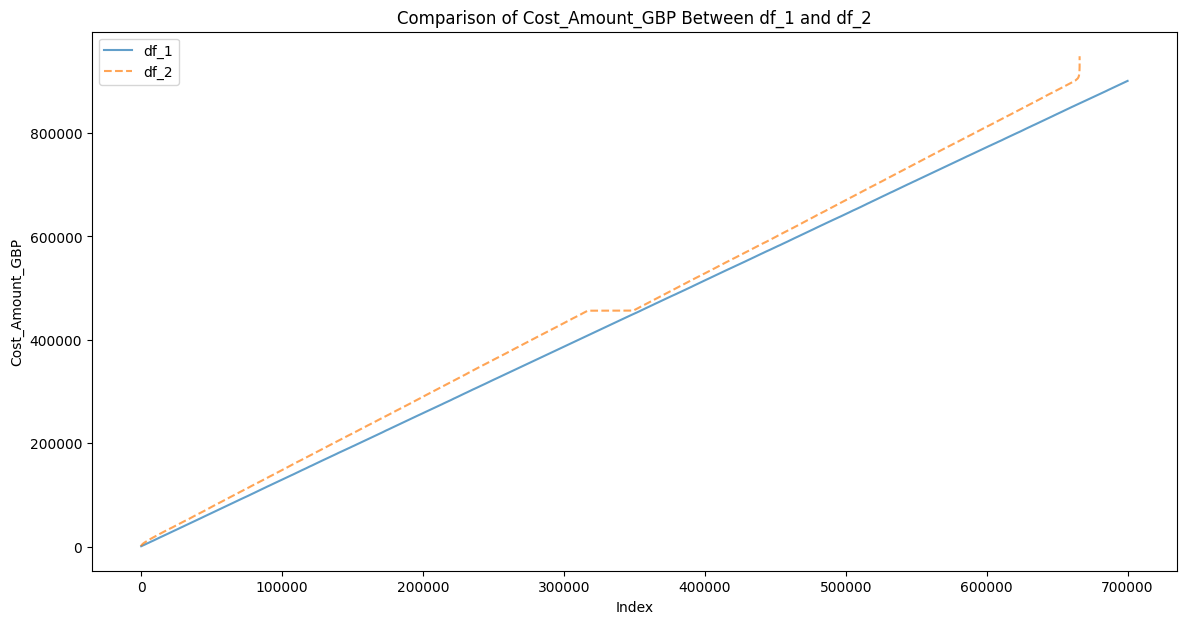

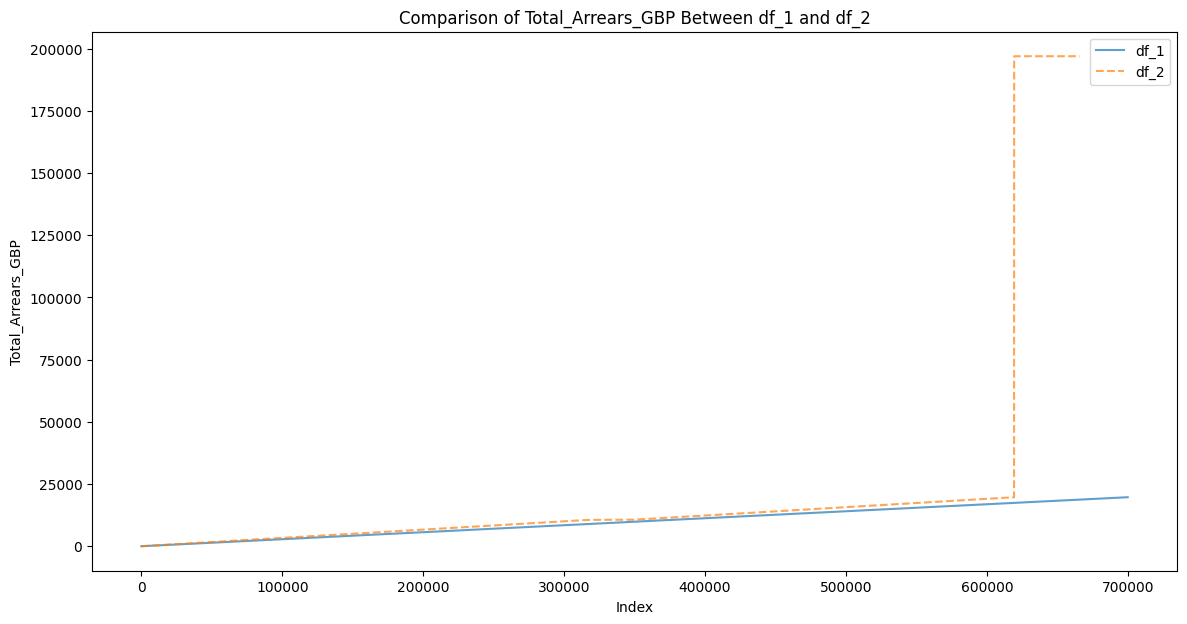

In [22]:
# Plotting line charts for Cost_Amount_GBP & Total_Arrears_GBP from both dfs
plt.figure(figsize=(14, 7))
plt.plot(df_1['Cost_Amount_GBP'].sort_values().reset_index(drop=True), label='df_1', alpha=0.7)
plt.plot(df_2['Cost_Amount_GBP'].sort_values().reset_index(drop=True), label='df_2', alpha=0.7, linestyle='--')
plt.title('Comparison of Cost_Amount_GBP Between df_1 and df_2')
plt.xlabel('Index')
plt.ylabel('Cost_Amount_GBP')
plt.legend()
plt.show()
print()
plt.figure(figsize=(14, 7))
plt.plot(df_1['Total_Arrears_GBP'].sort_values().reset_index(drop=True), label='df_1', alpha=0.7)
plt.plot(df_2['Total_Arrears_GBP'].sort_values().reset_index(drop=True), label='df_2', alpha=0.7, linestyle='--')
plt.title('Comparison of Total_Arrears_GBP Between df_1 and df_2')
plt.xlabel('Index')
plt.ylabel('Total_Arrears_GBP')
plt.legend()
plt.show()

In [23]:
# Loading unclean datasets for purposes of missing data comparison
raw_df_1 = pd.read_pickle('historical_arrears_data_1.pkl')
raw_df_2 = pd.read_pickle('historical_arrears_data_2.pkl')

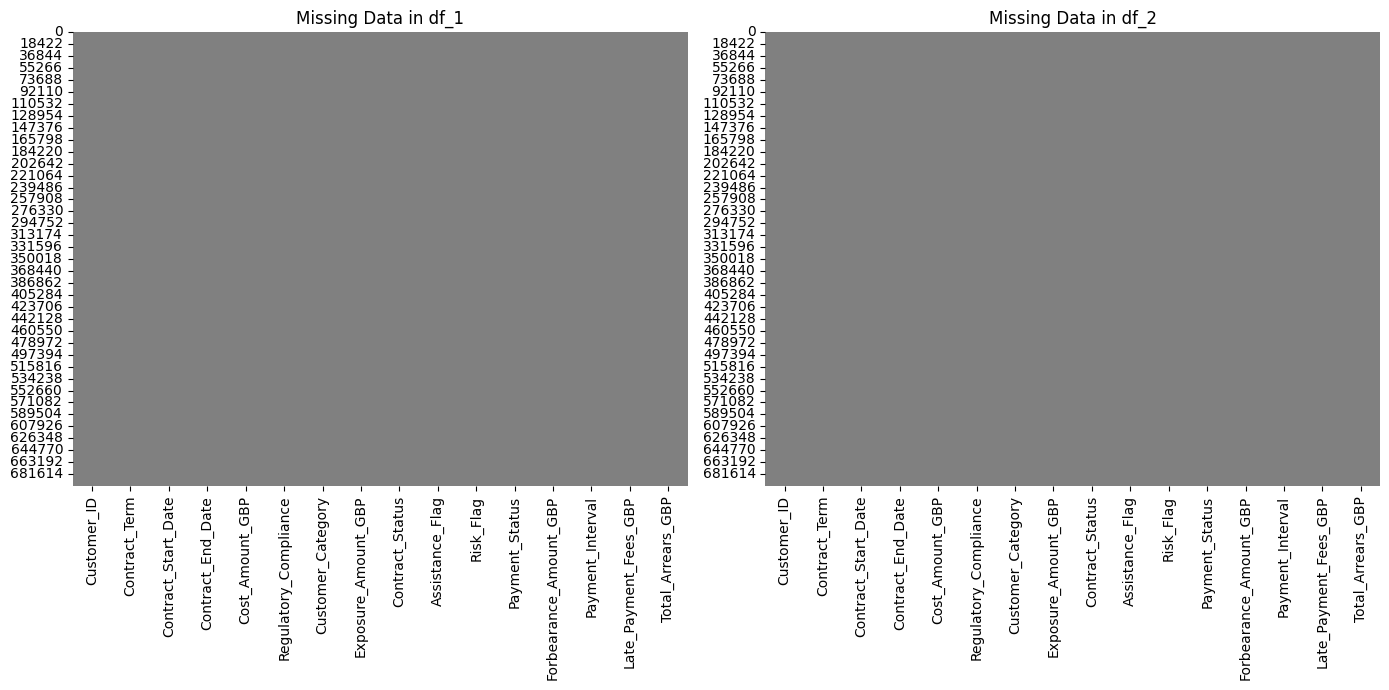

In [24]:
# Comparing the patterns of missing data between df_1 and df_2
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(raw_df_1.isnull(), cbar=False, cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Missing Data in df_1')

plt.subplot(1, 2, 2)
sns.heatmap(raw_df_2.isnull(), cbar=False, cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Missing Data in df_2')

plt.tight_layout()
plt.show()

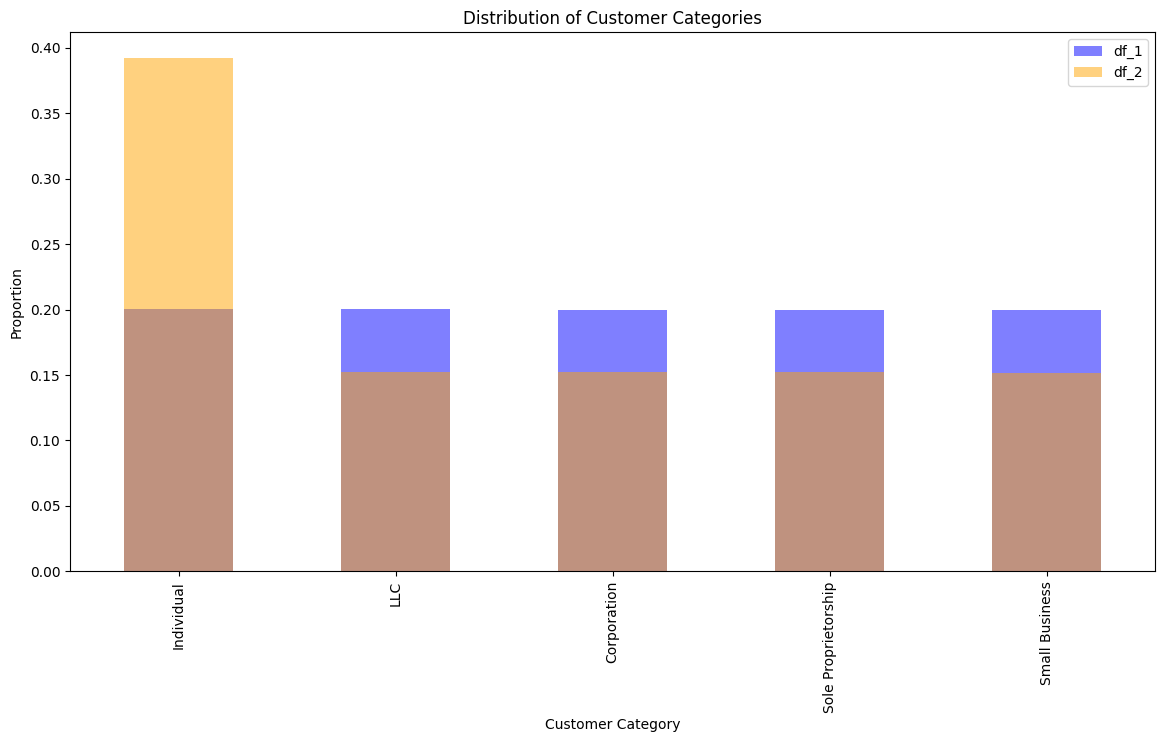

In [25]:
# Showing distribution of Customer_Category to highlight the bias
plt.figure(figsize=(14, 7))

df_1['Customer_Category'].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.5, label='df_1')
df_2['Customer_Category'].value_counts(normalize=True).plot(kind='bar', color='orange', alpha=0.5, label='df_2')
plt.title('Distribution of Customer Categories')
plt.xlabel('Customer Category')
plt.ylabel('Proportion')
plt.legend()
plt.show()

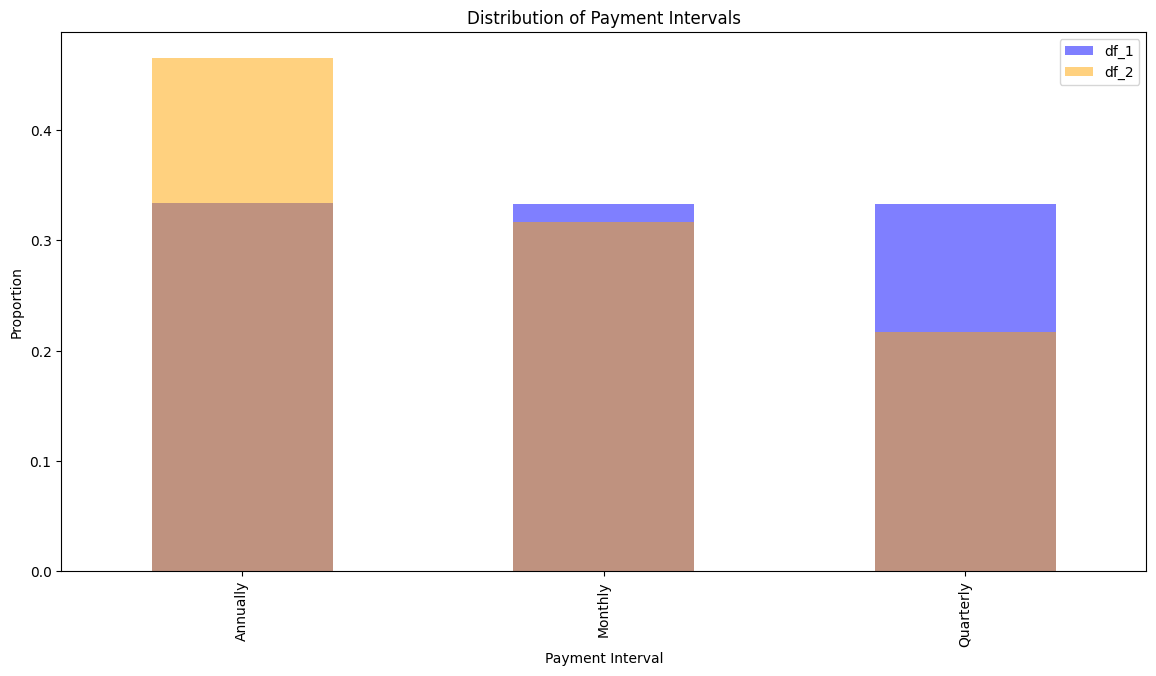

In [26]:
# Plot to compare frequency of Payment_Interval categories & highlighting the absence of 'Quarterly'
plt.figure(figsize=(14, 7))

df_1['Payment_Interval'].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.5, label='df_1')
df_2['Payment_Interval'].value_counts(normalize=True).plot(kind='bar', color='orange', alpha=0.5, label='df_2')
plt.title('Distribution of Payment Intervals')
plt.xlabel('Payment Interval')
plt.ylabel('Proportion')
plt.legend()
plt.show()

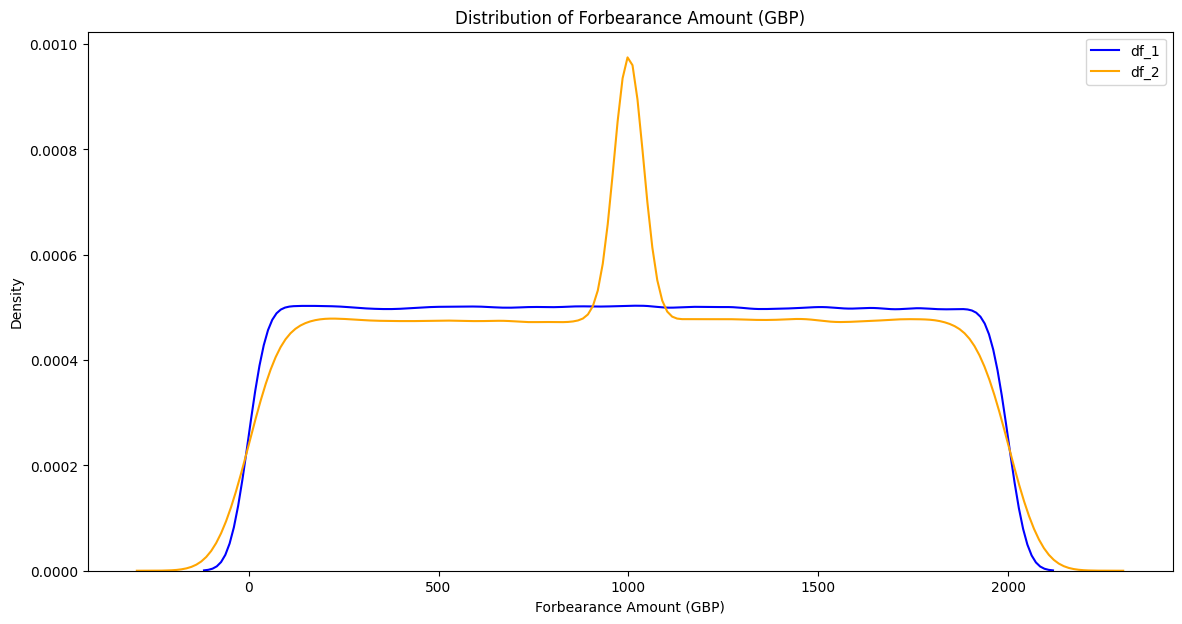

In [27]:
# Comparing distribution of Forbearance_Amount_GBP to observe added noise
plt.figure(figsize=(14, 7))

sns.kdeplot(df_1['Forbearance_Amount_GBP'], label='df_1', color='blue')
sns.kdeplot(df_2['Forbearance_Amount_GBP'], label='df_2', color='orange')
plt.title('Distribution of Forbearance Amount (GBP)')
plt.xlabel('Forbearance Amount (GBP)')
plt.ylabel('Density')
plt.legend()
plt.show()

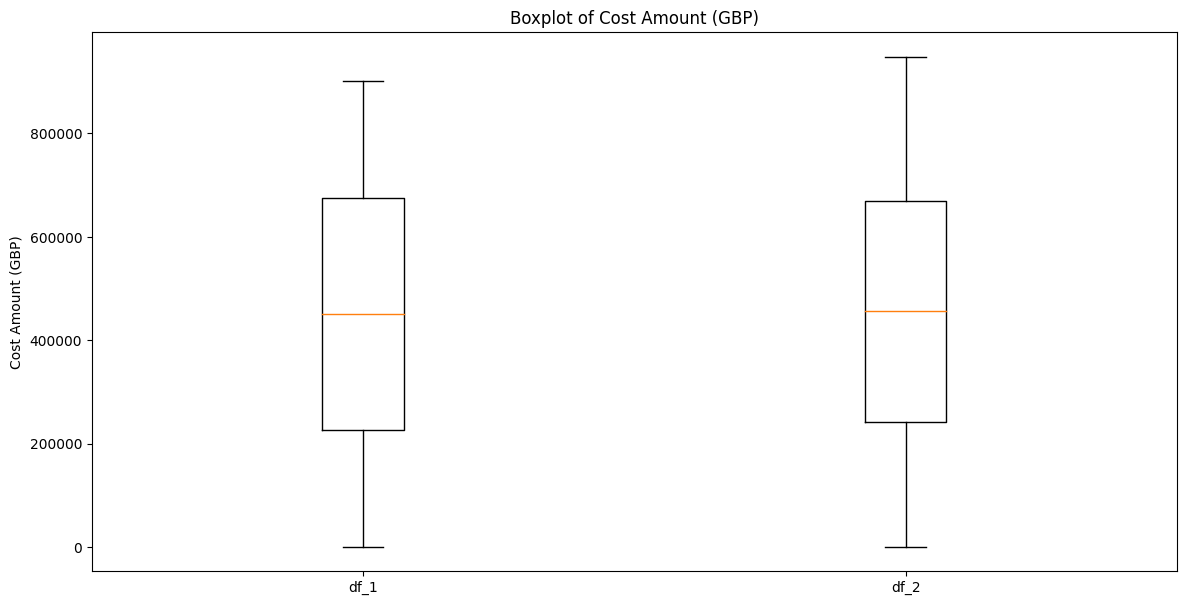

In [28]:
# Visualizing impact of skewness in Cost_Amount_GBP
plt.figure(figsize=(14, 7))

plt.boxplot([df_1['Cost_Amount_GBP'], df_2['Cost_Amount_GBP']], labels=['df_1', 'df_2'])
plt.title('Boxplot of Cost Amount (GBP)')
plt.ylabel('Cost Amount (GBP)')
plt.show()

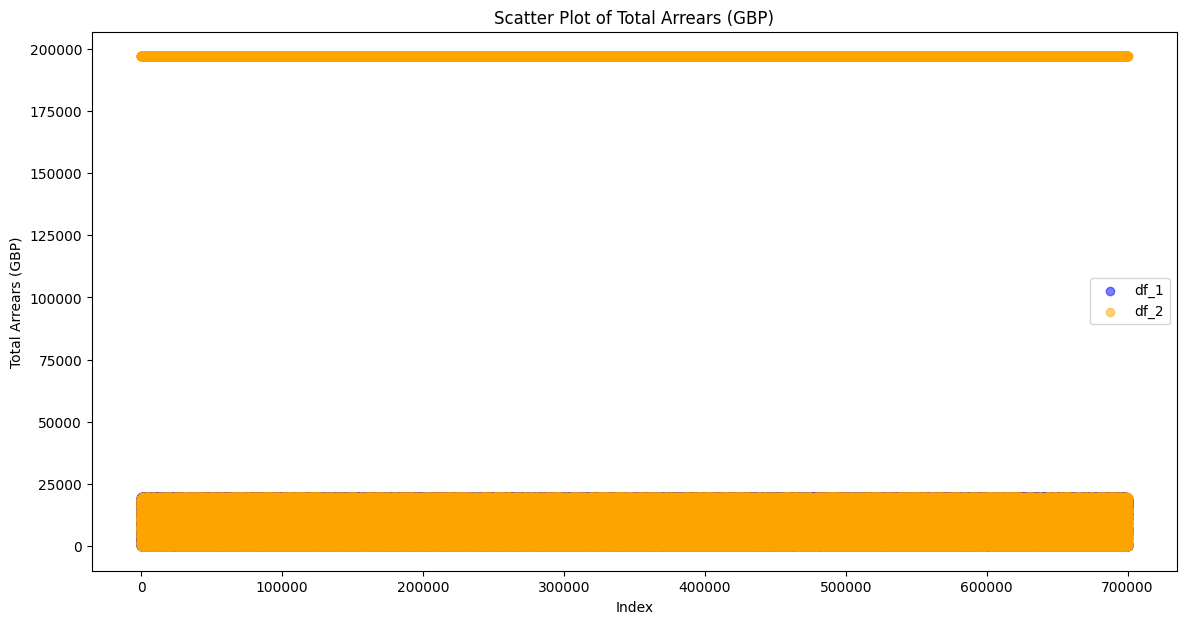

In [29]:
# Scatter plot to highlight outliers
plt.figure(figsize=(14, 7))

plt.scatter(df_1.index, df_1['Total_Arrears_GBP'], alpha=0.5, label='df_1', color='blue')
plt.scatter(df_2.index, df_2['Total_Arrears_GBP'], alpha=0.5, label='df_2', color='orange')
plt.title('Scatter Plot of Total Arrears (GBP)')
plt.xlabel('Index')
plt.ylabel('Total Arrears (GBP)')
plt.legend()
plt.show()

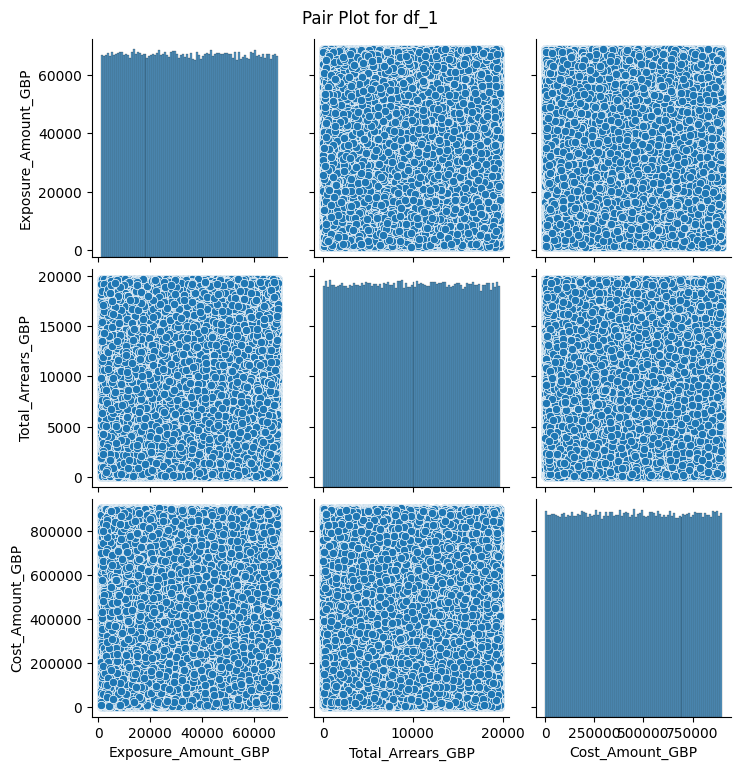

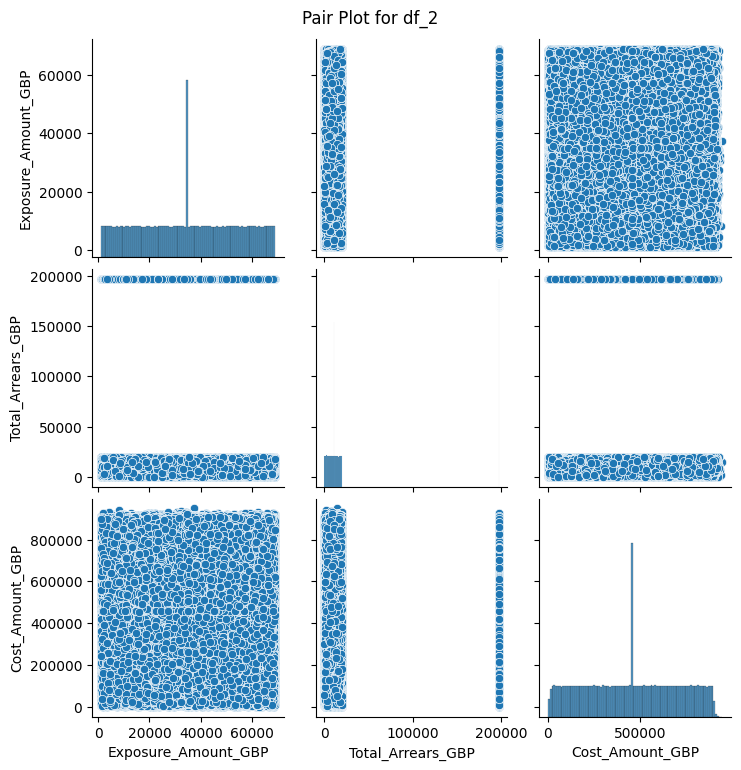

In [30]:
# Comparing multiple pairwise relationships between variables in dfs
sns.pairplot(df_1[['Exposure_Amount_GBP', 'Total_Arrears_GBP', 'Cost_Amount_GBP']])
plt.suptitle('Pair Plot for df_1', y=1.02)
plt.show()

sns.pairplot(df_2[['Exposure_Amount_GBP', 'Total_Arrears_GBP', 'Cost_Amount_GBP']])
plt.suptitle('Pair Plot for df_2', y=1.02)
plt.show()

In [31]:
# Defining target and features
target = 'Total_Arrears_GBP'
features_1 = df_1.columns.drop(['Customer_ID', target])
features_2 = df_2.columns.drop(['Customer_ID', target])

In [32]:
# Linear Regression, SVr, Neural Networks: Preprocessing with Scaling and One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Contract_Term', 'Cost_Amount_GBP', 'Exposure_Amount_GBP',
                                   'Forbearance_Amount_GBP', 'Late_Payment_Fees_GBP']),
        ('cat', OneHotEncoder(), ['Regulatory_Compliance', 'Customer_Category',
                                  'Contract_Status', 'Assistance_Flag',
                                  'Risk_Flag', 'Payment_Status', 'Payment_Interval'])
    ])

In [33]:
# Applying transformations to both dfs
X_1_transformed = preprocessor.fit_transform(df_1[features_1])
X_2_transformed = preprocessor.fit_transform(df_2[features_2])

In [34]:
# Redefining target variables
y_1 = df_1[target]
y_2 = df_2[target]

In [35]:
# Splitting data into train and test sets for df_1, df_2
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1_transformed, y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2_transformed, y_2, test_size=0.2, random_state=42)

In [36]:
# Saving splits for Linear Regression, SVR, Neural Networks
with open('logistic_svm_nn_splits_df1.pkl', 'wb') as f:
    pickle.dump((X_train_1, X_test_1, y_train_1, y_test_1), f)
with open('logistic_svm_nn_splits_df2.pkl', 'wb') as f:
    pickle.dump((X_train_2, X_test_2, y_train_2, y_test_2), f)

In [37]:
# Random Forest, Gradient Boosting: Label Encoding for Categorical Features
X_1_label_encoded = df_1[features_1].copy()
X_2_label_encoded = df_2[features_2].copy()

In [38]:
# Applying label encoding to categorical features in both dfs - RF/GB
for col in X_1_label_encoded.select_dtypes(include='category').columns:
    le = LabelEncoder()
    X_1_label_encoded[col] = le.fit_transform(X_1_label_encoded[col])
    X_2_label_encoded[col] = le.fit_transform(X_2_label_encoded[col])

In [39]:
# Splitting label-encoded data into train and test sets for df_1, df_2
le_X_train_1, le_X_test_1, le_y_train_1, le_y_test_1 = train_test_split(X_1_label_encoded, y_1, test_size=0.2, random_state=42)
le_X_train_2, le_X_test_2, le_y_train_2, le_y_test_2 = train_test_split(X_2_label_encoded, y_2, test_size=0.2, random_state=42)

In [40]:
# Saving splits for Random Forest, Gradient Boosting
with open('rf_gb_splits_df1.pkl', 'wb') as f:
    pickle.dump((le_X_train_1, le_X_test_1, le_y_train_1, le_y_test_1), f)
with open('rf_gb_splits_df2.pkl', 'wb') as f:
    pickle.dump((le_X_train_2, le_X_test_2, le_y_train_2, le_y_test_2), f)

In [41]:
# Printing shapes of training and testing sets for verification - LR/SVM/NN
print(f'Training data shape for df_1 (Logistic/SVM/NN): {X_train_1.shape}')
print(f'Testing data shape for df_1 (Logistic/SVM/NN): {X_test_1.shape}')
print(f'Training data shape for df_2 (Logistic/SVM/NN): {X_train_2.shape}')
print(f'Testing data shape for df_2 (Logistic/SVM/NN): {X_test_2.shape}')

Training data shape for df_1 (Logistic/SVM/NN): (560000, 25)
Testing data shape for df_1 (Logistic/SVM/NN): (140000, 25)
Training data shape for df_2 (Logistic/SVM/NN): (532768, 25)
Testing data shape for df_2 (Logistic/SVM/NN): (133192, 25)


In [42]:
# Printing shapes of training and testing sets for verification - RF/GB
print(f'Training data shape for df_1 (RF/GB): {X_train_1.shape}')
print(f'Testing data shape for df_1 (RF/GB): {X_test_1.shape}')
print(f'Training data shape for df_2 (RF/GB): {X_train_2.shape}')
print(f'Testing data shape for df_2 (RF/GB): {X_test_2.shape}')

Training data shape for df_1 (RF/GB): (560000, 25)
Testing data shape for df_1 (RF/GB): (140000, 25)
Training data shape for df_2 (RF/GB): (532768, 25)
Testing data shape for df_2 (RF/GB): (133192, 25)
